# H$_2$ prototype - energy & rdm1

In [56]:
import pyscf
from pyscf import gto, scf, dft, ao2mo, fci
import numpy as np
import scipy.linalg as lin
import matplotlib.pyplot as plt

In [57]:
HARTREE_TO_eV = 27.311285

In [58]:
1.0/(0.3166808991e-5*27.311285)

11562.0807045062

In [59]:
npoints = 30
R_begin=0.5
R_end=4.5
R = np.linspace(start=R_begin,stop=R_end,num=npoints)

In [125]:
def get_entropy(mf,mo_occ=None):
    if mo_occ is None:
        f = mf.get_occ()/2
    else:
        f = mo_occ / 2
    #print(f)
    f = f[(f>0) & (f<1)]
    return -2*(f*np.log(f) + (1-f)*np.log(1-f)).sum()

In [61]:
def run_rks(mol_str,smear=False,tau=500,basis='cc-pVTZ'):
    mol = gto.M(atom=mol_str, basis=basis)
    mol.smearing = smear
    mol.tau = tau
    mf = scf.RKS(mol)
    mf.xc='PBE'
    mf.run()
    h1 = mf.mo_coeff.T.dot(mf.get_hcore()).dot(mf.mo_coeff)
    rdm1=mf.make_rdm1()
    T = mf.mol.intor_symmetric('int1e_kin')
    Ekin = np.einsum('pq,qp', T, rdm1)*HARTREE_TO_eV
    #print("Ts: ", Ekin)
    #d = np.zeros(h1.shape[0])
    s = mf.get_occ()
    #for i in np.arange(h1.shape[0]):
    #    d[i] = h1[i,i]
    return s, mf, Ekin, mf.energy_tot()*HARTREE_TO_eV

In [94]:
def run_fci(mol_str,basis='cc-pVTZ'):
    mol = gto.M(atom=mol_str, basis=basis)
    mf = scf.RHF(mol)
    mf.run()
    norb=np.shape(mf.get_occ())[0]
    h1 = mf.mo_coeff.T.dot(mf.get_hcore()).dot(mf.mo_coeff)
    T = mf.mo_coeff.T.dot(mf.mol.intor_symmetric('int1e_kin')).dot(mf.mo_coeff)
    eri = ao2mo.kernel(mol, mf.mo_coeff)
    cisolver = fci.direct_spin1.FCI(mol)
    e, ci = cisolver.kernel(h1, eri, h1.shape[1], mol.nelec, ecore=mol.energy_nuc())
    rdm1=cisolver.make_rdm1(fcivec=ci,norb=norb,nelec=mol.nelec)
    Ekin = np.einsum('pq,qp', T, rdm1)*HARTREE_TO_eV
    #print("exact T: ", Ekin)
    #d = np.zeros(h1.shape[0])
    s = lin.eigh(rdm1)[0]
    #s = np.zeros(h1.shape[0])
    #for i in np.arange(h1.shape[0]):
    #    #d[i] = h1[i,i]
    #    s[i] = rdm1[i,i]
    return s, mf, Ekin, e*HARTREE_TO_eV


In [63]:
smear = False
occupations_KS = []
energies_KS = []
calculations_KS = []
Ekin_KS = []
ener_KS = []
for i in np.arange(npoints):
    mol_str = "H 0 0 0; H 0 0 "+str(R[i])
    s, mf, Ekin, e = run_rks(mol_str=mol_str, smear=smear)
    occupations_KS.append(s)
    calculations_KS.append(mf)
    Ekin_KS.append(Ekin)
    ener_KS.append(e)

converged SCF energy = -1.09191079551157
converged SCF energy = -1.15570660382185
converged SCF energy = -1.1657707497024
converged SCF energy = -1.15392422250323
converged SCF energy = -1.1333343304918
converged SCF energy = -1.10993548019576
converged SCF energy = -1.08652820559596
converged SCF energy = -1.06444183526048
converged SCF energy = -1.04426556213363
converged SCF energy = -1.02620063047972
converged SCF energy = -1.01024465873264
converged SCF energy = -0.996290770905432
converged SCF energy = -0.984182495193473
converged SCF energy = -0.973742428759461
converged SCF energy = -0.964788200580431
converged SCF energy = -0.957142195582558
converged SCF energy = -0.950637609642804
converged SCF energy = -0.945121950146175
converged SCF energy = -0.940458470065313
converged SCF energy = -0.936525988165003
converged SCF energy = -0.933217859405868
converged SCF energy = -0.930440820434552
converged SCF energy = -0.928113738162466
converged SCF energy = -0.926166646865308
conve

In [69]:
tau = 11562.0807045062 #KT=1eV
smear = True
occupations_KS_tau = []
energies_KS_tau = []
calculations_KS_tau = []
Ekin_KS_tau = []
ener_KS_tau = []

for i in np.arange(npoints):
    mol_str = "H 0 0 0; H 0 0 "+str(R[i])
    s, mf, Ekin, e = run_rks(mol_str=mol_str,tau=tau,smear=smear)
    occupations_KS_tau.append(s)
    calculations_KS_tau.append(mf)
    if smear:
        mTS=-0.3166808991e-5*tau*get_entropy(mf)*HARTREE_TO_eV
    else:
        mTS = 0.0
    print(mTS)
    Ekin_KS_tau.append(Ekin)
    ener_KS_tau.append(e+mTS)

converged SCF energy = -1.09097830906853
-0.029011478505998466
converged SCF energy = -1.15402641243354
-0.05305563077271781
converged SCF energy = -1.16274225694275
-0.09742359805641845
converged SCF energy = -1.14858281934555
-0.17583140393394855
converged SCF energy = -1.12434517471328
-0.304480763516135
converged SCF energy = -1.09582720740085
-0.4949846912832785
converged SCF energy = -1.06615188257744
-0.7462542324749535
converged SCF energy = -1.0374438082397
-1.0413244460881113
converged SCF energy = -1.01130017277285
-1.3523457489953696
converged SCF energy = -0.988770892977809
-1.6505645948818515
converged SCF energy = -0.970295279111154
-1.9147660517963325
converged SCF energy = -0.955775219318065
-2.134375123783306
converged SCF energy = -0.94475704831882
-2.307992209408041
converged SCF energy = -0.936625306339188
-2.4400450447193
converged SCF energy = -0.930749455903513
-2.537593652434144
converged SCF energy = -0.926568816410962
-2.6081117687463506
converged SCF energy 

In [95]:
occupations_FCI = []
energies_FCI = []
calculations_FCI = []
Ekin_FCI = []
ener_FCI = []
for i in np.arange(npoints):
    mol_str = "H 0 0 0; H 0 0 "+str(R[i])
    s, mf, Ekin, e = run_fci(mol_str=mol_str)
    occupations_FCI.append(s)
    calculations_FCI.append(mf)
    Ekin_FCI.append(Ekin)
    ener_FCI.append(e)

converged SCF energy = -1.06330677086093
converged SCF energy = -1.12472263417086
converged SCF energy = -1.13185974071706
converged SCF energy = -1.11665632235809
converged SCF energy = -1.0923609398329
converged SCF energy = -1.06495830542229
converged SCF energy = -1.03728479887597
converged SCF energy = -1.0106982908468
converged SCF energy = -0.985817133884628
converged SCF energy = -0.96287836034824
converged SCF energy = -0.941921705670047
converged SCF energy = -0.922886043676355
converged SCF energy = -0.905661462621326
converged SCF energy = -0.890117054341109
converged SCF energy = -0.876114606717424
converged SCF energy = -0.863515669847535
converged SCF energy = -0.852186417974785
converged SCF energy = -0.842001232519819
converged SCF energy = -0.832844640642622
converged SCF energy = -0.824611746986229
converged SCF energy = -0.8172077952204
converged SCF energy = -0.810547418632858
converged SCF energy = -0.80455383673203
converged SCF energy = -0.799158049919527
conver

In [96]:
occupations_FCI = np.array(occupations_FCI,dtype=np.float)
occupations_KS = np.array(occupations_KS,dtype=np.float)
occupations_KS_tau = np.array(occupations_KS_tau,dtype=np.float)

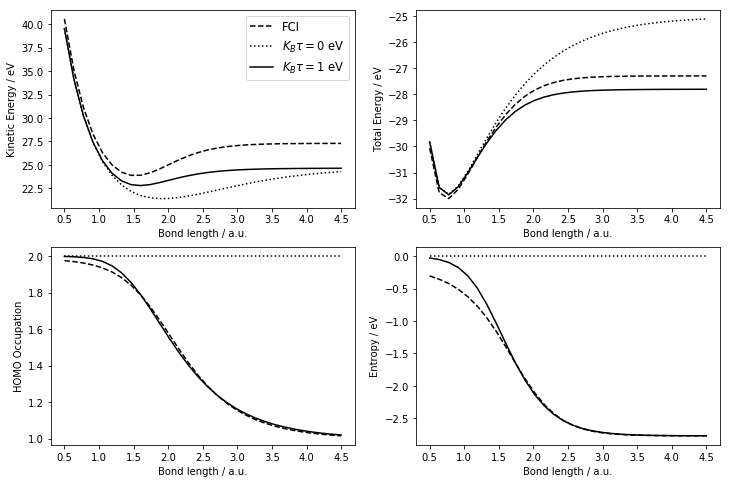

In [126]:
font=11.5
fig, ax = plt.subplots(2,2,figsize=(12,8))
#
ax[0,0].set_ylabel("Kinetic Energy / eV")
ax[0,0].plot(R,Ekin_FCI,label=r'FCI',color='black',linestyle='--')
ax[0,0].plot(R,Ekin_KS,label=r'$K_B\tau = 0$ eV',color='black',linestyle=':')
ax[0,0].plot(R,Ekin_KS_tau,label=r'$K_B\tau = 1$ eV',color='black',linestyle='-')
#
ax[0,1].set_ylabel("Total Energy / eV")
ax[0,1].plot(R,ener_FCI,label=r'FCI',color='black',linestyle='--')
ax[0,1].plot(R,ener_KS,label=r'$K_B\tau = 0$ eV',color='black',linestyle=':')
ax[0,1].plot(R,ener_KS_tau,label=r'$K_B\tau = 1$ eV',color='black',linestyle='-')
#
ax[1,0].set_ylabel("HOMO Occupation")
ax[1,0].plot(R,occupations_FCI[:,-1],label=r'FCI',color='black',linestyle='--')
ax[1,0].plot(R,occupations_KS[:,0],label=r'$K_B\tau = 0$ eV',color='black',linestyle=':')
ax[1,0].plot(R,occupations_KS_tau[:,0],label=r'$K_B\tau = 1$ eV',color='black',linestyle='-')
#ax[1,0].set_ylim([0.5,2.5])
#
ax[1,1].set_ylabel("Entropy / eV")
entropy_KS = np.zeros(npoints)
entropy_KS_tau = np.zeros(npoints)
entropy_FCI = np.zeros(npoints)
for i in range(npoints):
    #entropy_KS[i]=-0.3166808991e-5*tau*get_entropy(calculations_KS_tau[i])
    entropy_KS_tau[i]=-0.3166808991e-5*tau*get_entropy(calculations_KS_tau[i])*HARTREE_TO_eV
    entropy_FCI[i]=-0.3166808991e-5*tau*get_entropy(calculations_FCI[i],occupations_FCI[i,:])*HARTREE_TO_eV

ax[1,1].plot(R,entropy_FCI,label=r'FCI',color='black',linestyle='--')
ax[1,1].plot(R,entropy_KS,label=r'$K_B\tau = 0$ eV',color='black',linestyle=':')
ax[1,1].plot(R,entropy_KS_tau,label=r'$K_B\tau = 1$ eV',color='black',linestyle='-')

ax[0,0].legend(fontsize=font)
for i in 0, 1:
    for j in 0, 1:
#        ax[i,j].legend(fontsize=font)
        ax[i,j].set_xlabel("Bond length / a.u.")
plt.savefig("H2_FCI.pdf")
plt.show()

In [124]:
occupations_KS_tau[:,2]

array([1.77858279e-04, 1.63102886e-04, 1.26029494e-04, 8.64743786e-05,
       5.54794584e-05, 3.48606815e-05, 2.21871597e-05, 1.46032646e-05,
       1.00477889e-05, 7.23819480e-06, 5.44185322e-06, 4.30460122e-06,
       3.70232571e-06, 3.58644990e-06, 3.88550144e-06, 4.50048147e-06,
       5.32858933e-06, 6.26992429e-06, 7.22811785e-06, 8.11545618e-06,
       8.85899089e-06, 9.40870846e-06, 9.73701302e-06, 9.84757251e-06,
       9.75775758e-06, 9.50379021e-06, 9.13501724e-06, 8.68798291e-06,
       8.20888798e-06, 7.72658258e-06])

# prototyping natural orbitals

In [12]:
SVD = lin.svd

In [13]:
U, s, Vh = SVD(a=rdm1)

NameError: name 'rdm1' is not defined

In [ ]:
h1_natural = np.dot(Vh.T, np.dot(h1, U.T))

In [ ]:
d = np.zeros(h1_natural.shape[0])
s = np.zeros(h1_natural.shape[0])
for i in np.arange(h1_natural.shape[0]):
    d[i] = h1_natural[i,i]
    s[i] = rdm1[i,i]

In [ ]:
plt.scatter(x=d,y=s)
plt.show()